# Air transportation Ocurrences
## Analysis

In [141]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import sys
sys.path.append("../scripts")

In [143]:
from data_loader import load_data_from_csv
from common.export_csv import exportDataVersion
import pandas as pd
import numpy as np

### <font color=#43599e>Loading Data</font>

In [144]:
#Load data
df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2csv': {len(df)}")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.head()

# of rows 'fullData_V2csv': 47791


,OccID,Latitude,Longitude,CountryID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccTime,OccTypeID_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,Summary,InjuriesEnum_DisplayEng,AircraftTypeID_DisplayEng,AircraftMakeID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,NumberOfEngine,DamageLevelID_DisplayEng,OperationTypeID_DisplayEng
0,150172,46.284740,-63.644120,CANADA,2017-07-10,NaN,14:15:00,ACCIDENT,PRINCE EDWARD ISLAND,2017-07-10,C-IICE a privately operated Quad City Challeng...,Yes,ADVANCED ULTRALIGHT,CHALLENGER,NaN,PRIVATE,0-2250 KG (0-4960 LBS),LIGHT,2015,1,SUBSTANTIAL,PLEASURE/TRAVEL
1,150171,50.772778,-96.821389,CANADA,2017-07-10,ENGINE (i),13:55:00,INCIDENT,MANITOBA,2017-07-10,C-GWCP a Piper PA-32-300 aircraft operated by ...,No,AEROPLANE,PIPER,MHA ENTERPRISES,COMMERCIAL,0-2250 KG (0-4960 LBS),LIGHT,1968,1,MINOR,AIR TRANSPORT
2,150170,37.638169,-122.375428,UNITED STATES,2017-07-08,RISK OF COLLISION (x),06:56:00,INCIDENT,CALIFORNIA,2017-07-09,C-FKCK an Airbus 320-200 aircraft operated by ...,No,AEROPLANE,AIRBUS,AIR CANADA,COMMERCIAL,27001-272000 KG (59526-599650 LBS),MEDIUM,1991,2,NONE,AIR TRANSPORT
3,150169,48.650000,-93.500000,CANADA,2017-07-05,DIFFICULT TO CONTROL (iv),02:15:00,INCIDENT,ONTARIO,2017-07-07,C-GJVC a Fairchild SA227-DC aircraft operated ...,Yes,AEROPLANE,FAIRCHILD,BEARSKIN LAKE AIR SERVICE,COMMERCIAL,5701-27000 KG (12566-59525 LBS),MEDIUM,1996,2,NONE,AIR TRANSPORT
4,150168,66.448611,-92.464444,CANADA,2017-07-02,NaN,22:00:00,ACCIDENT,NUNAVUT,2017-07-05,C-GGSV an Aerospatiale AS 350 B-2 aircraft ope...,No,HELICOPTER,AEROSPATIALE,GREAT SLAVE HELICOPTERS,COMMERCIAL,0-2250 KG (0-4960 LBS),LIGHT,1989,1,SUBSTANTIAL,AIR TRANSPORT


In [145]:
from analysis.map_visualization import plot_coordinates_heatmap
from analysis.frequency_visualization import plot_frequency

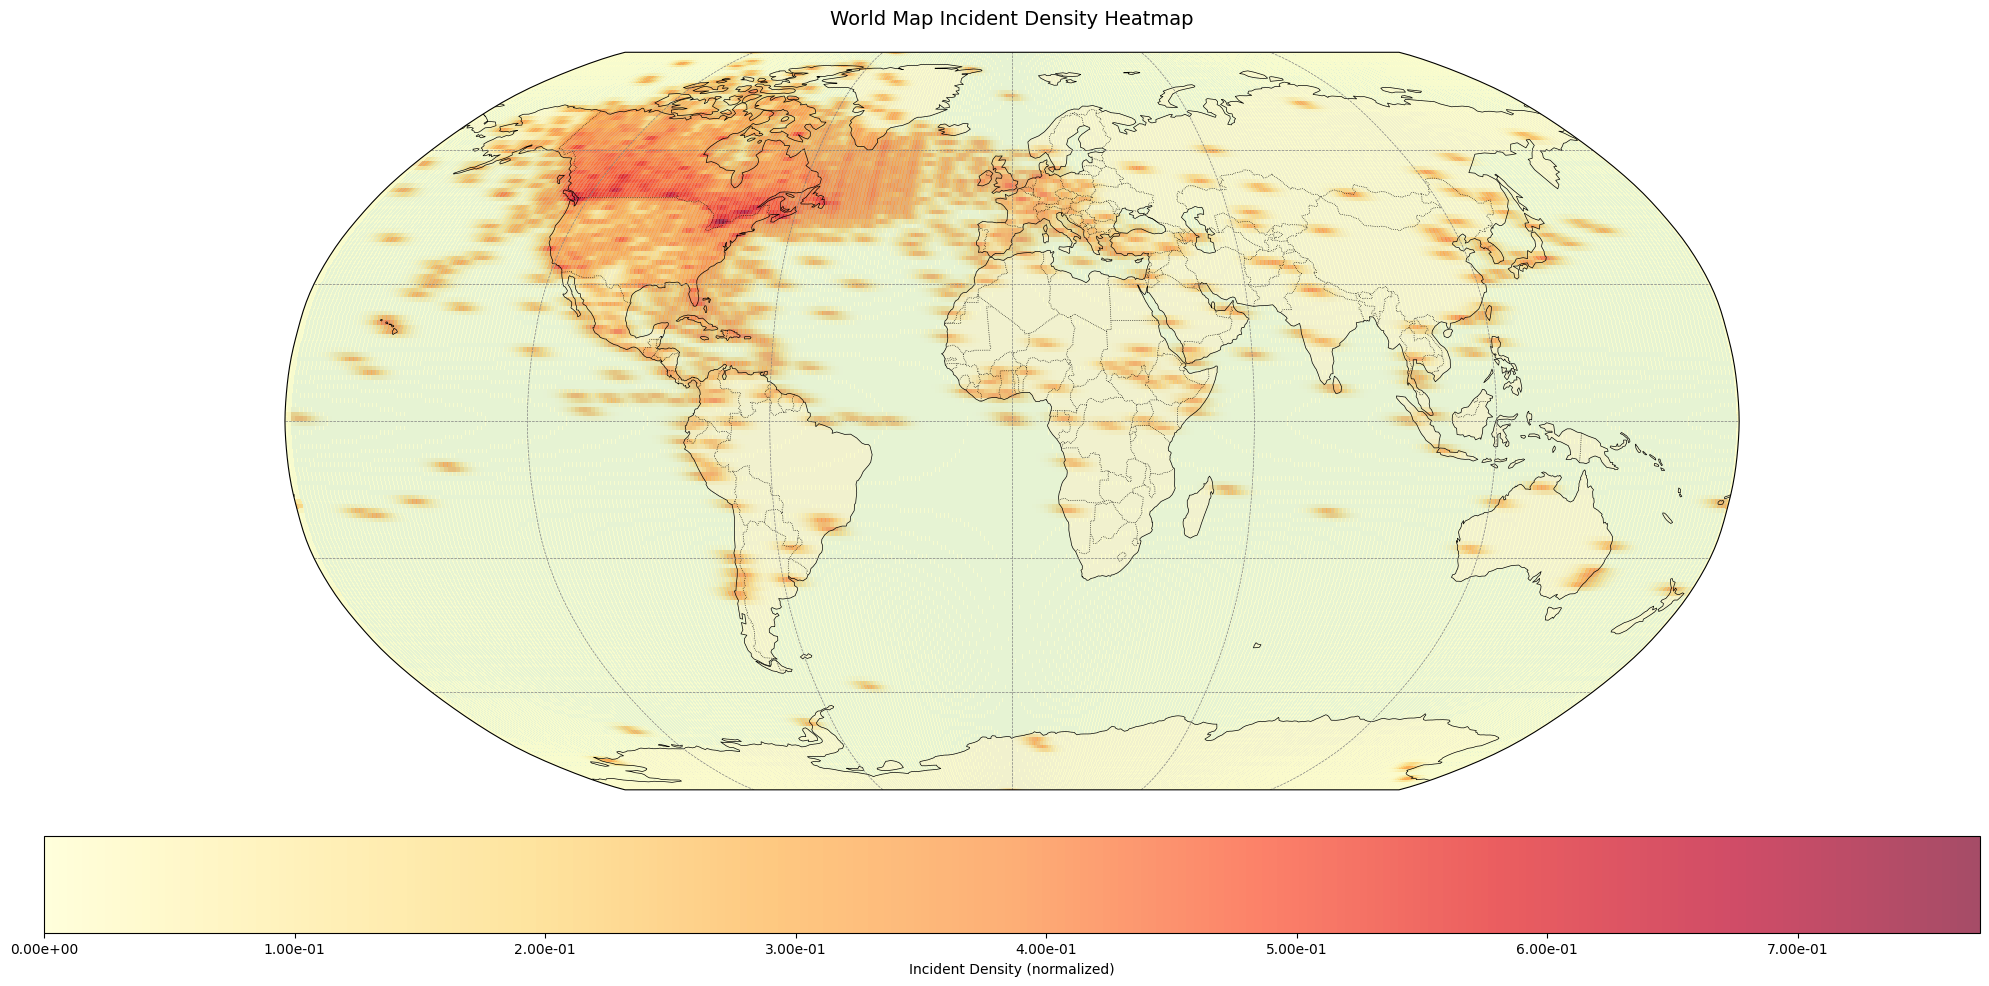

In [146]:
coords = df[['Latitude', 'Longitude']]
coordinates_list = list(zip(coords['Latitude'], coords['Longitude']))
plot_coordinates_heatmap(coordinates_list)

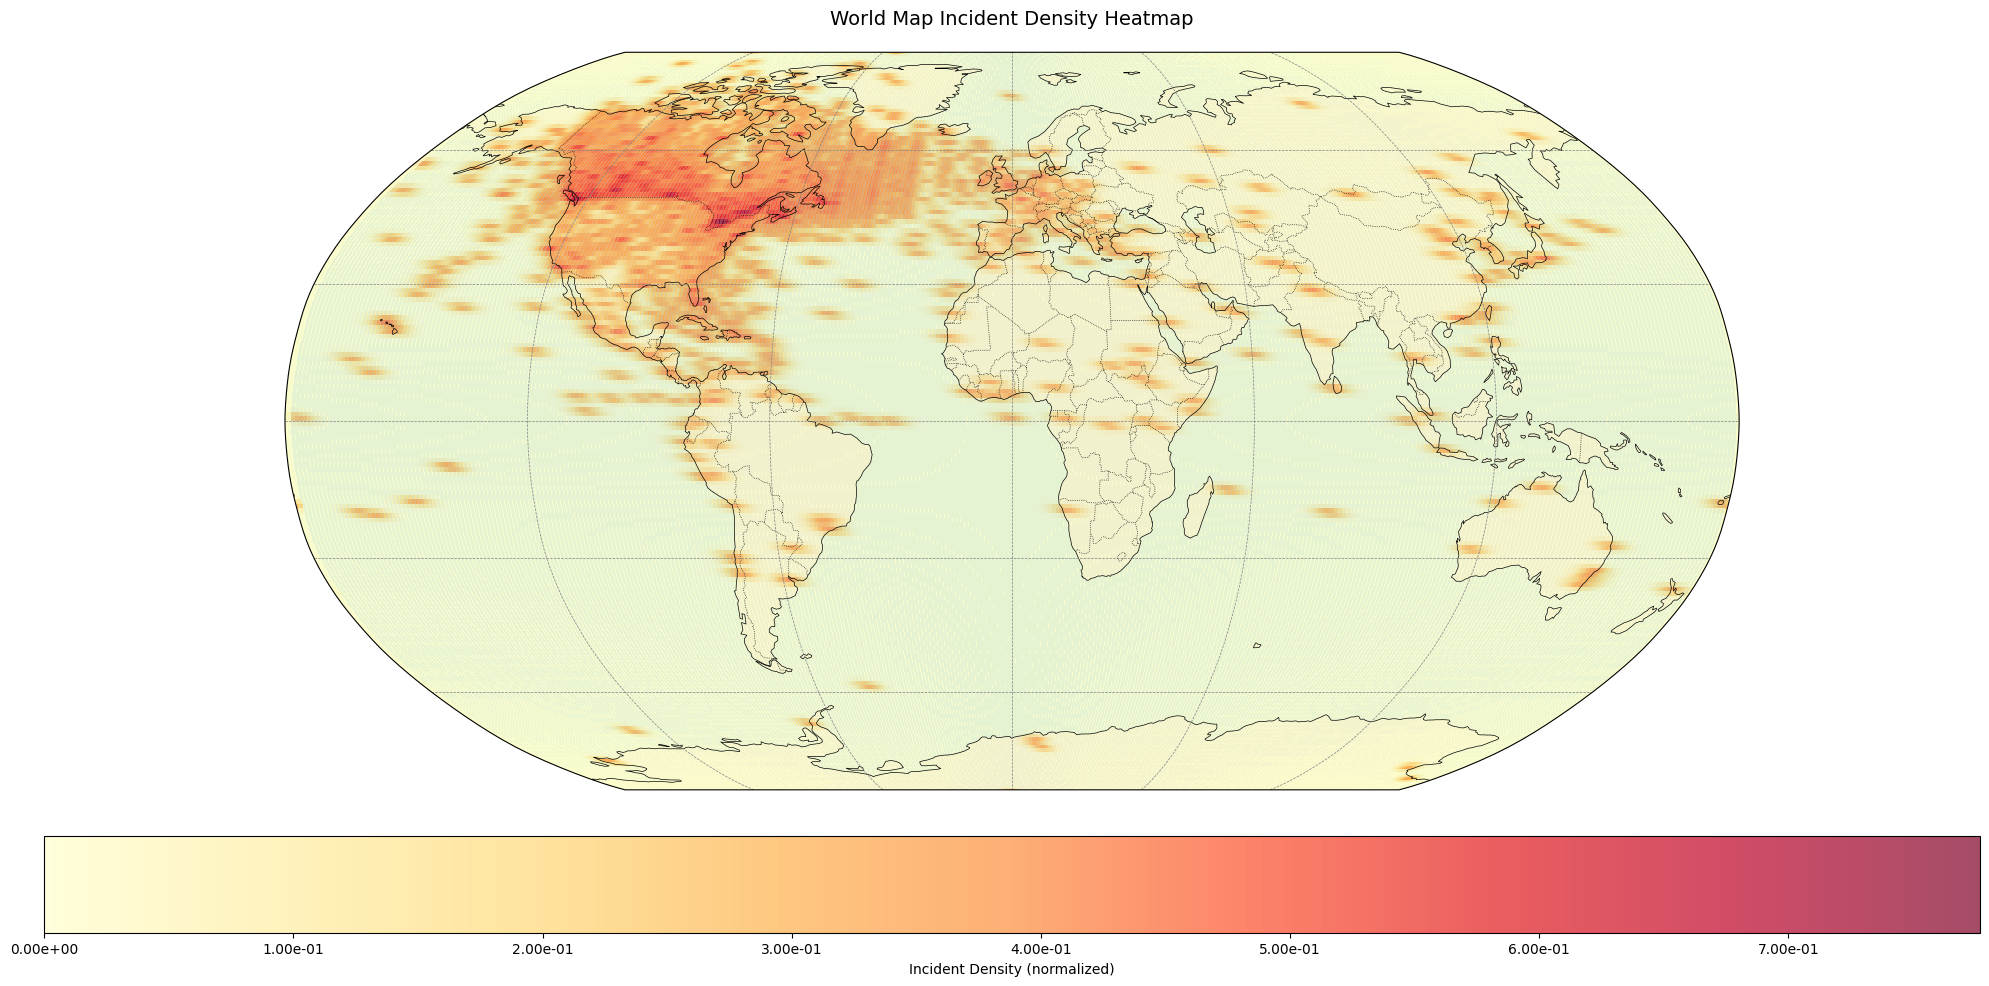

In [147]:
aeroplane_coords = df[df["AircraftTypeID_DisplayEng"] == "AEROPLANE"][["Latitude", "Longitude"]]
aeroplane_coords = list(zip(aeroplane_coords['Latitude'], aeroplane_coords['Longitude']))
plot_coordinates_heatmap(aeroplane_coords)

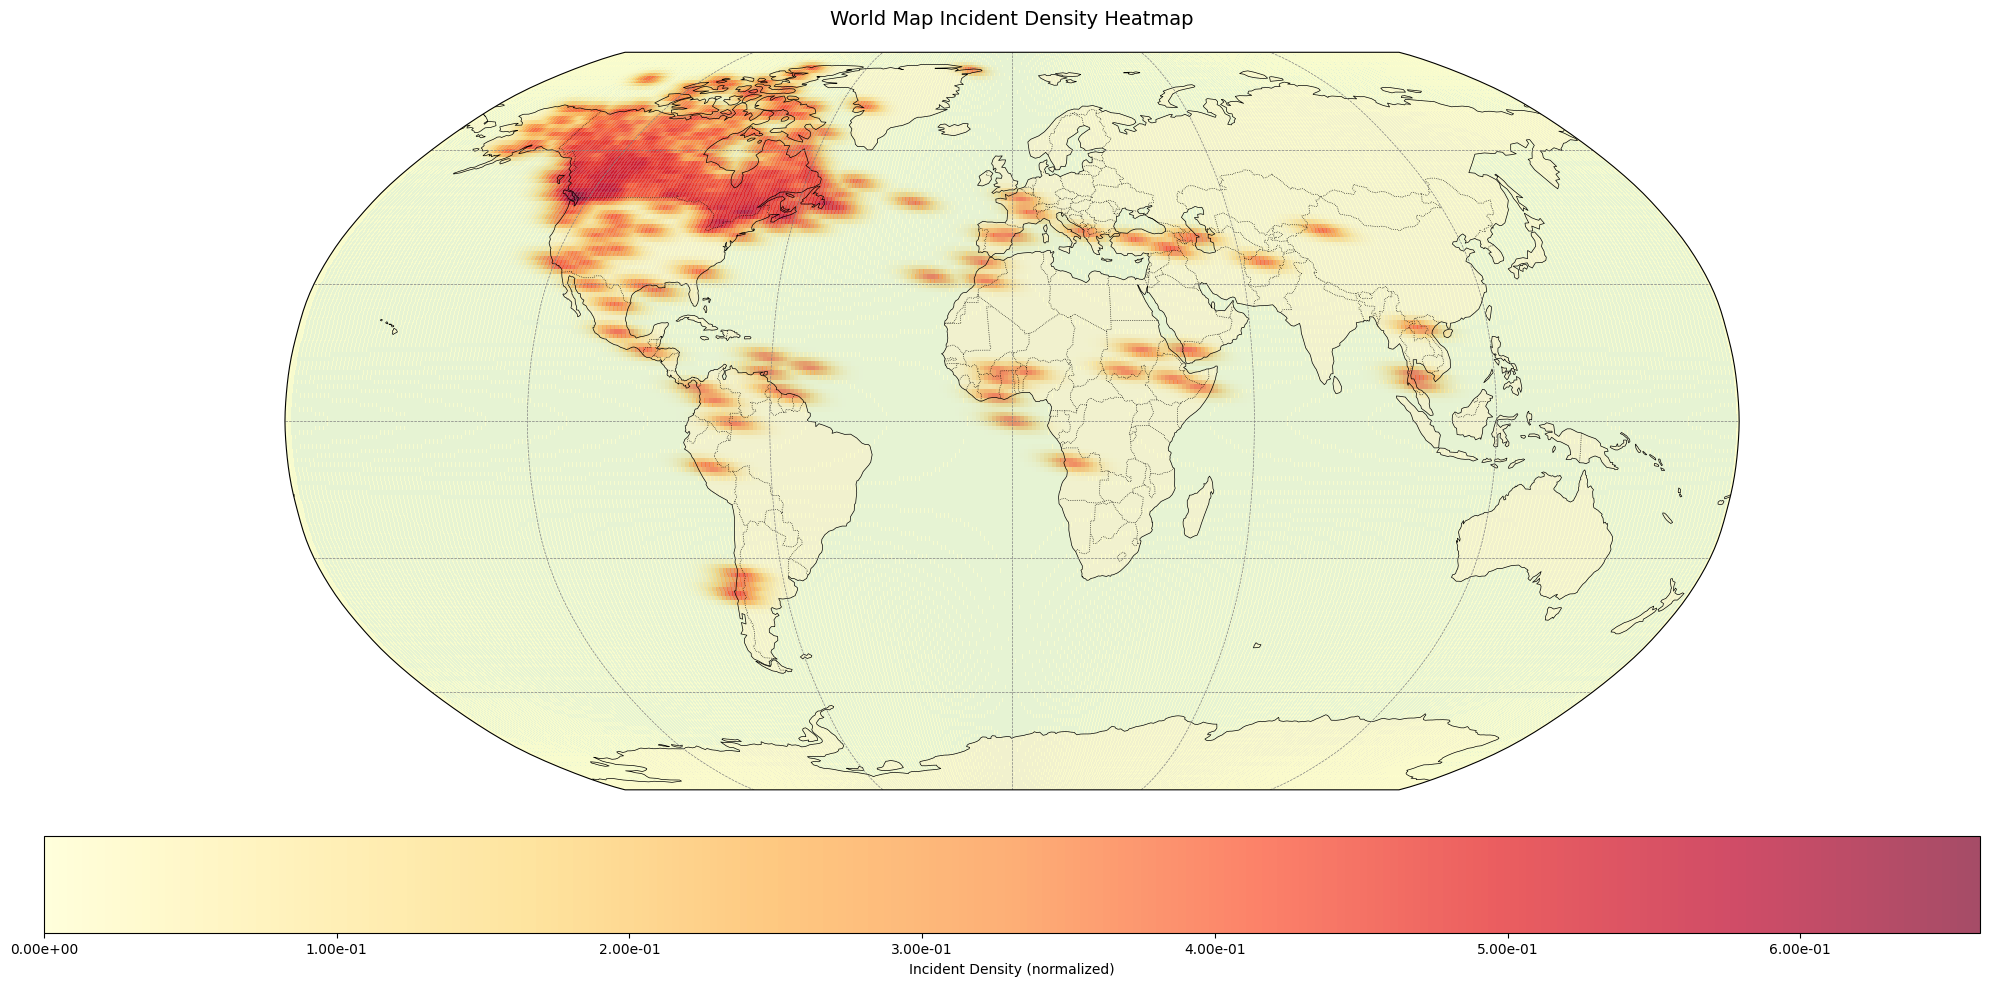

In [148]:
heli_coords = df[df["AircraftTypeID_DisplayEng"] == "HELICOPTER"][["Latitude", "Longitude"]]
heli_coords = list(zip(heli_coords['Latitude'], heli_coords['Longitude']))
plot_coordinates_heatmap(heli_coords)

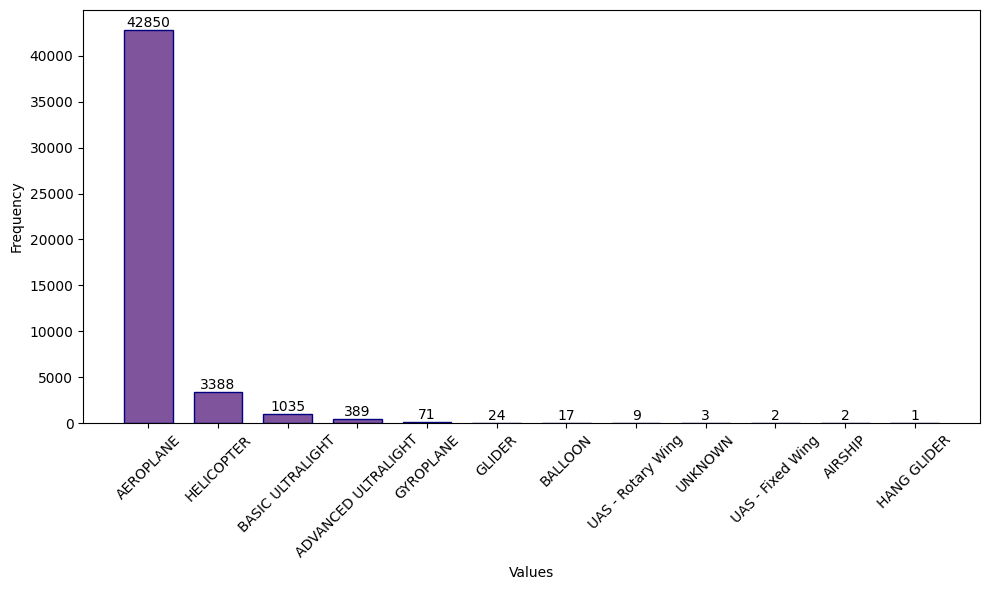

In [149]:
# frequency distributionn of aircraft type
aircraft_type = df['AircraftTypeID_DisplayEng'].dropna()
plot_frequency(aircraft_type, color='#80549c')

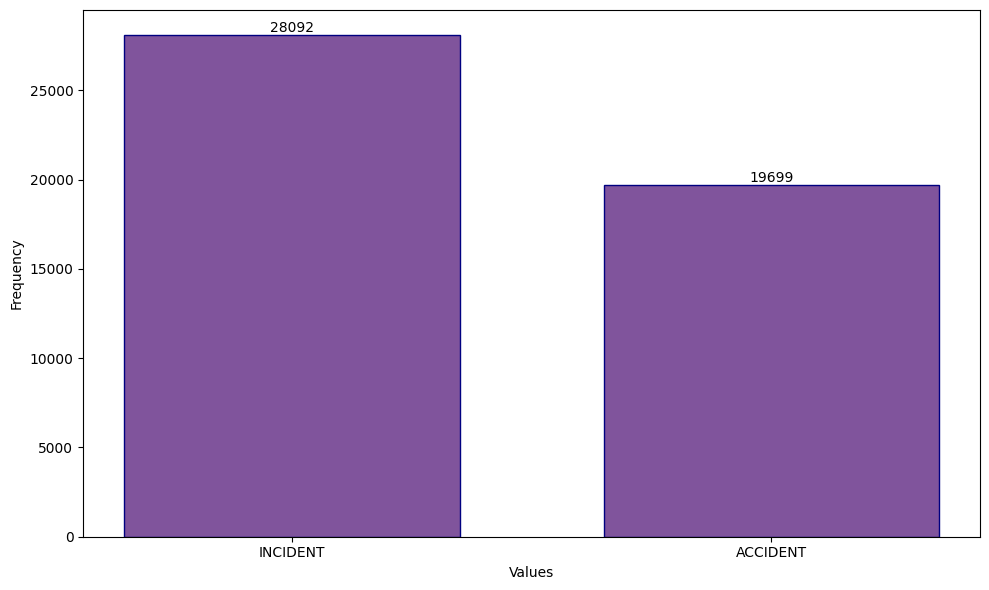

In [150]:
# frequency distributionn of occurence type
occ_type = df['OccTypeID_DisplayEng'].dropna()
plot_frequency(occ_type, rotation=0, color='#80549c')

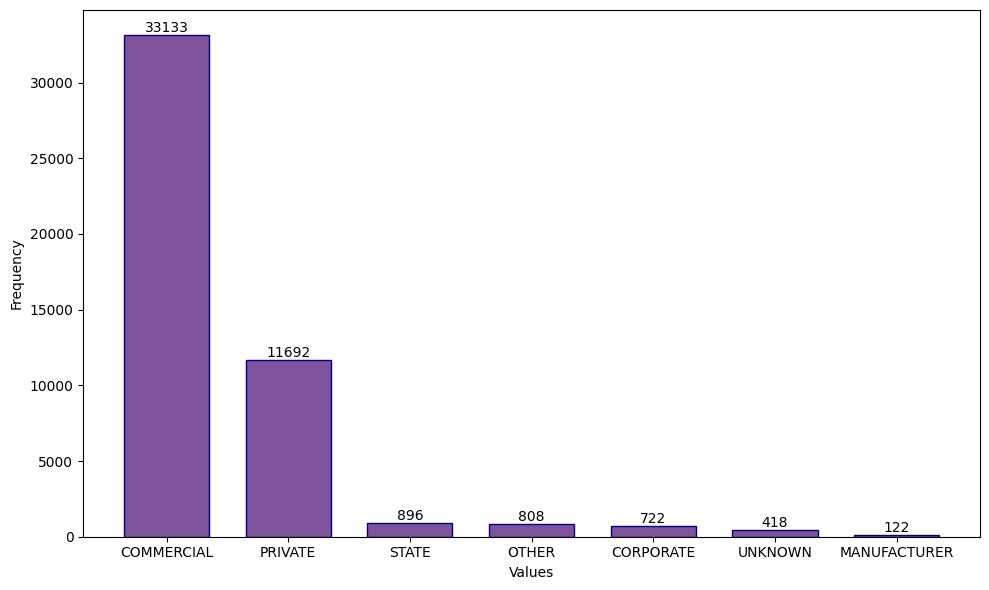

In [151]:
# frequency distributionn of operator type
opp_type = df['OperatorTypeID_DisplayEng'].dropna()
plot_frequency(opp_type, rotation=0, color='#80549c')

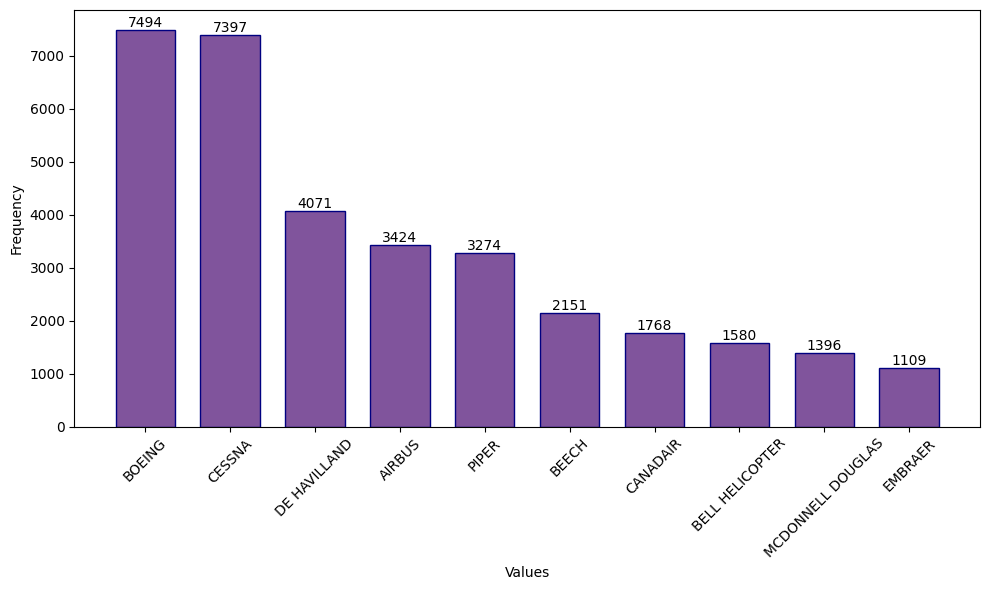

In [152]:
# frequency distributionn of province
make = df['AircraftMakeID_DisplayEng'].dropna()
plot_frequency(make, color='#80549c', limit=10, rotation=45)
# AircraftMakeID_DisplayEng

In [153]:
from analysis.boeing_visualization import analyze_boeing_occurrences

[*********************100%***********************]  1 of 1 completed


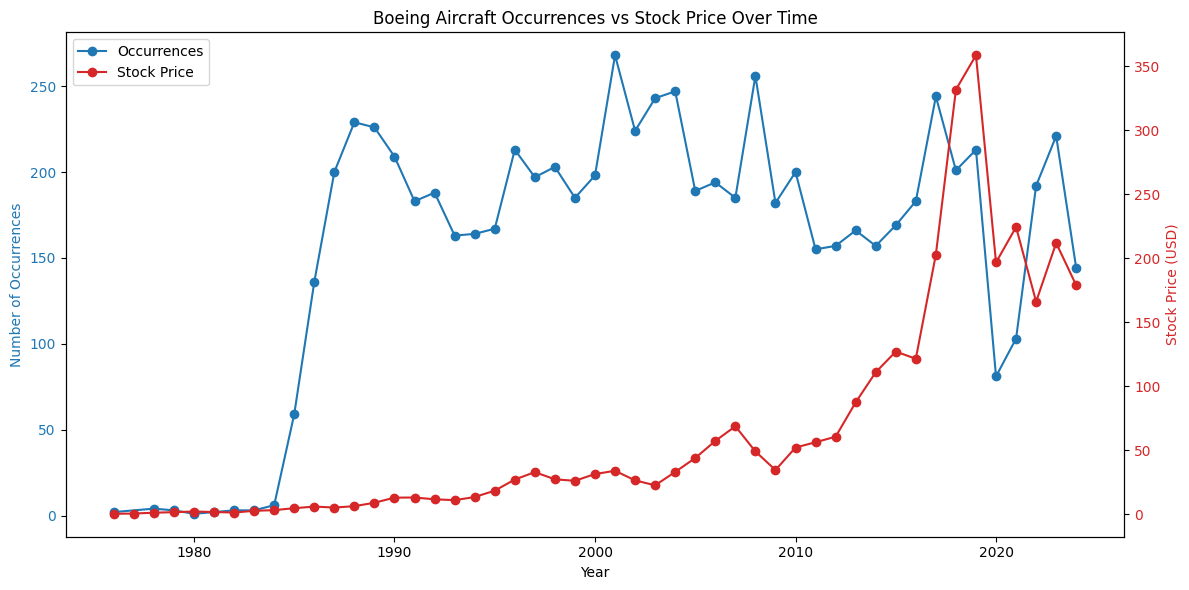

In [170]:
analyze_boeing_occurrences(df)

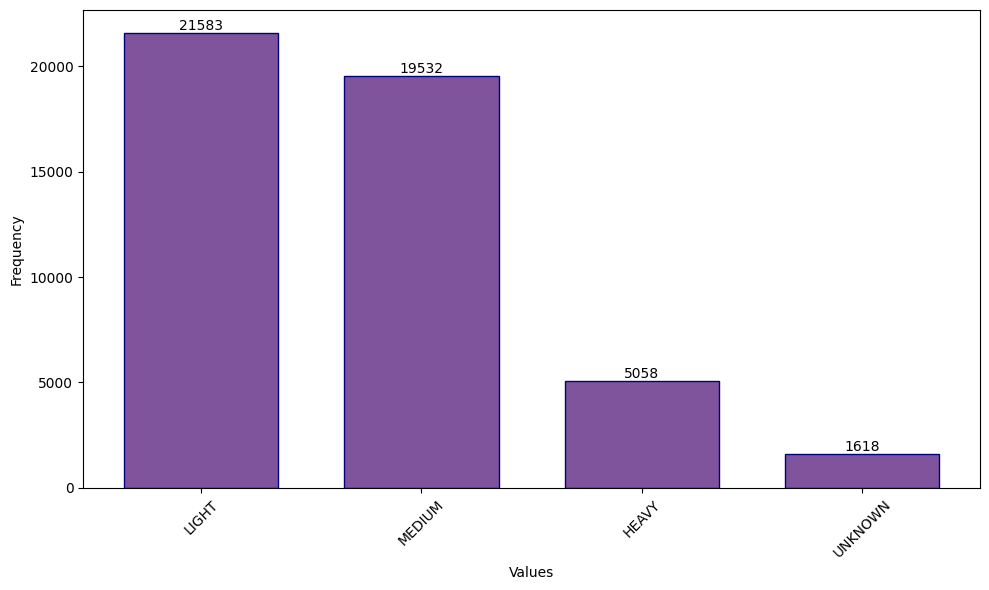

In [155]:
# frequency distributionn of turbulance
turbulence = df['WakeTurbulenceCategoryID_DisplayEng'].dropna()
plot_frequency(turbulence, color='#80549c', rotation=45)

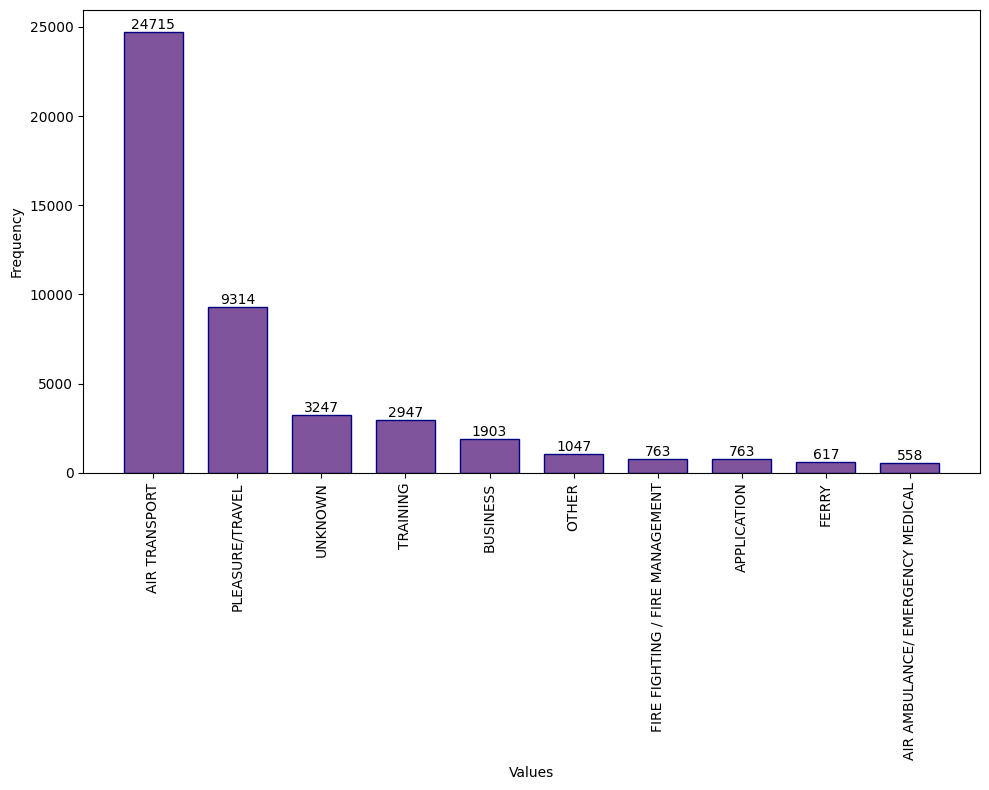

In [156]:
plot_frequency(df['OperationTypeID_DisplayEng'].dropna(), color='#80549c', rotation=90, limit=10, figsize=(10,8))

In [157]:
from analysis.histogram_visualization import plot_manufacturing_year_histogram

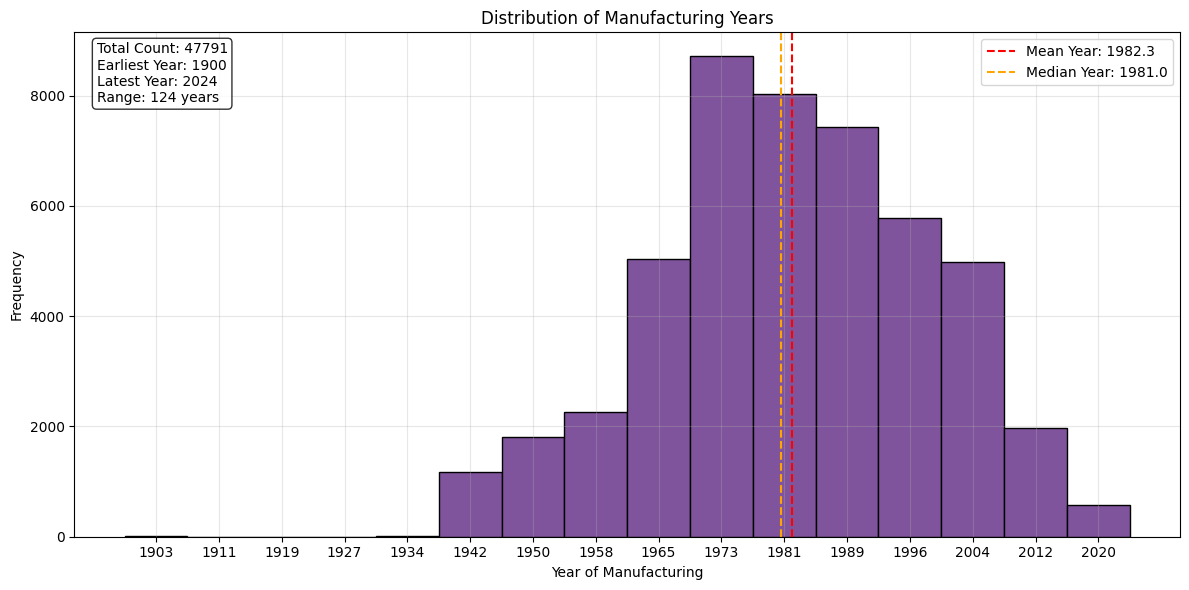

In [158]:
plot_manufacturing_year_histogram(df['YearOfManuf'], color='#80549c')

In [159]:
from analysis.map_visualization import create_canada_frequency_choropleth

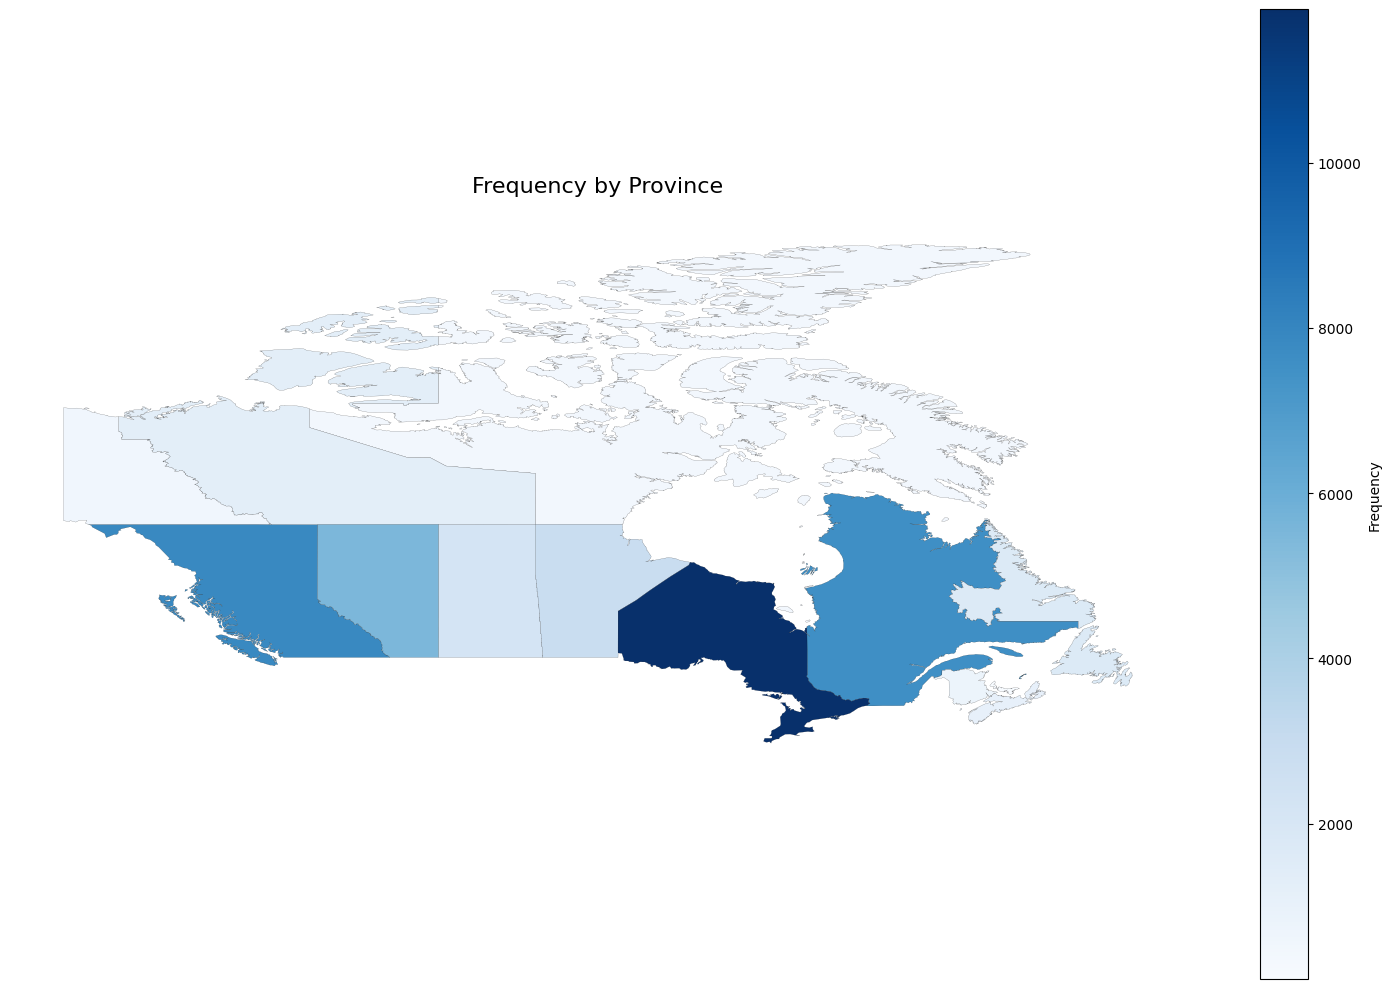

In [160]:
create_canada_frequency_choropleth(df)

In [161]:
from analysis.time_visualization import visualize_incident_times, get_time_statistics, create_province_year_heatmap, create_province_month_heatmap

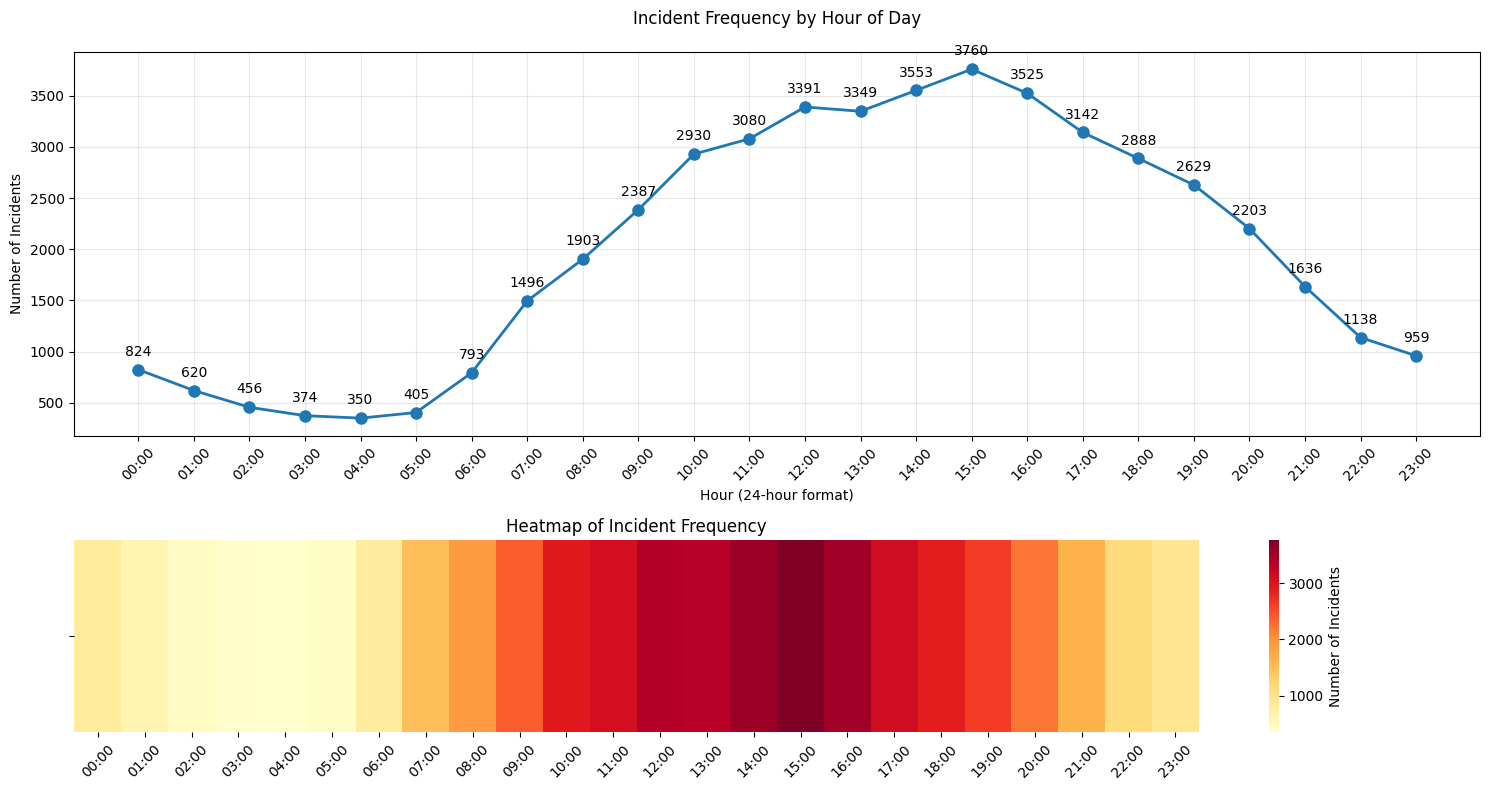

In [162]:
visualize_incident_times(df)

In [163]:
get_time_statistics(df)

{'peak_hour': '15:00',
 'peak_hour_incidents': np.int64(3760),
 'quietest_hour': '04:00',
 'quietest_hour_incidents': np.int64(350),
 'morning_incidents': np.int64(12589),
 'afternoon_incidents': np.int64(20720),
 'evening_incidents': np.int64(11453),
 'night_incidents': np.int64(3029)}

In [164]:
from analysis.date_visualization import visualize_date_frequencies, visualize_yearly_trend, visualize_quarterly_trend

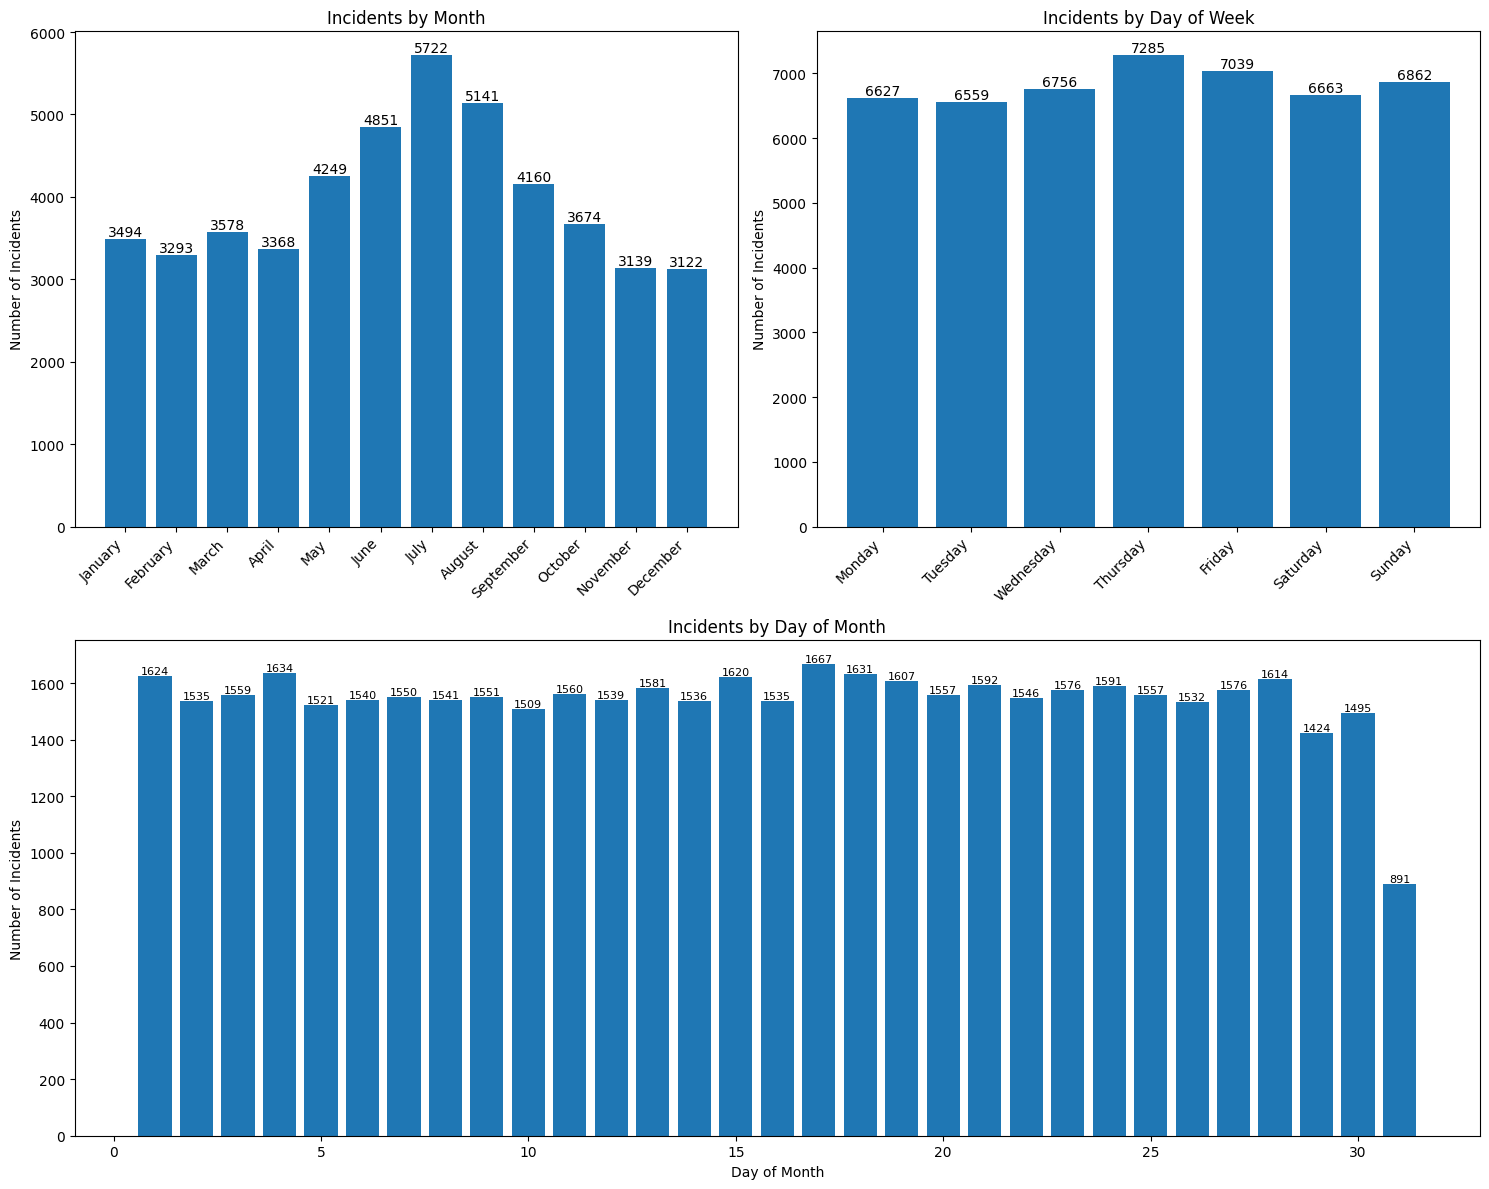

In [165]:
visualize_date_frequencies(df)

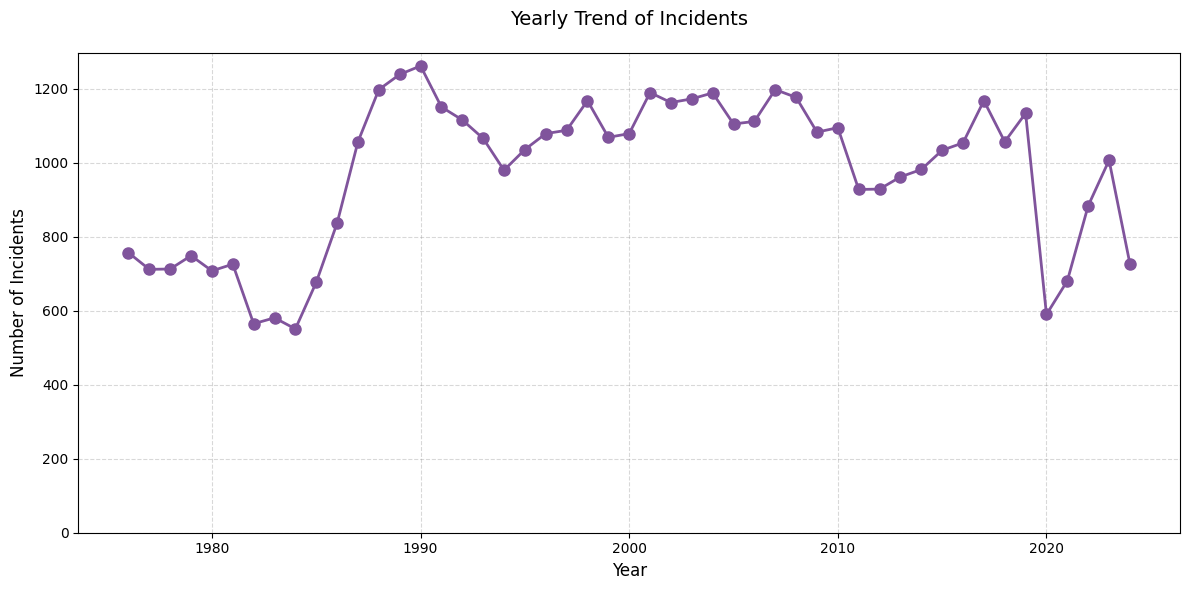

In [166]:
visualize_yearly_trend(df)

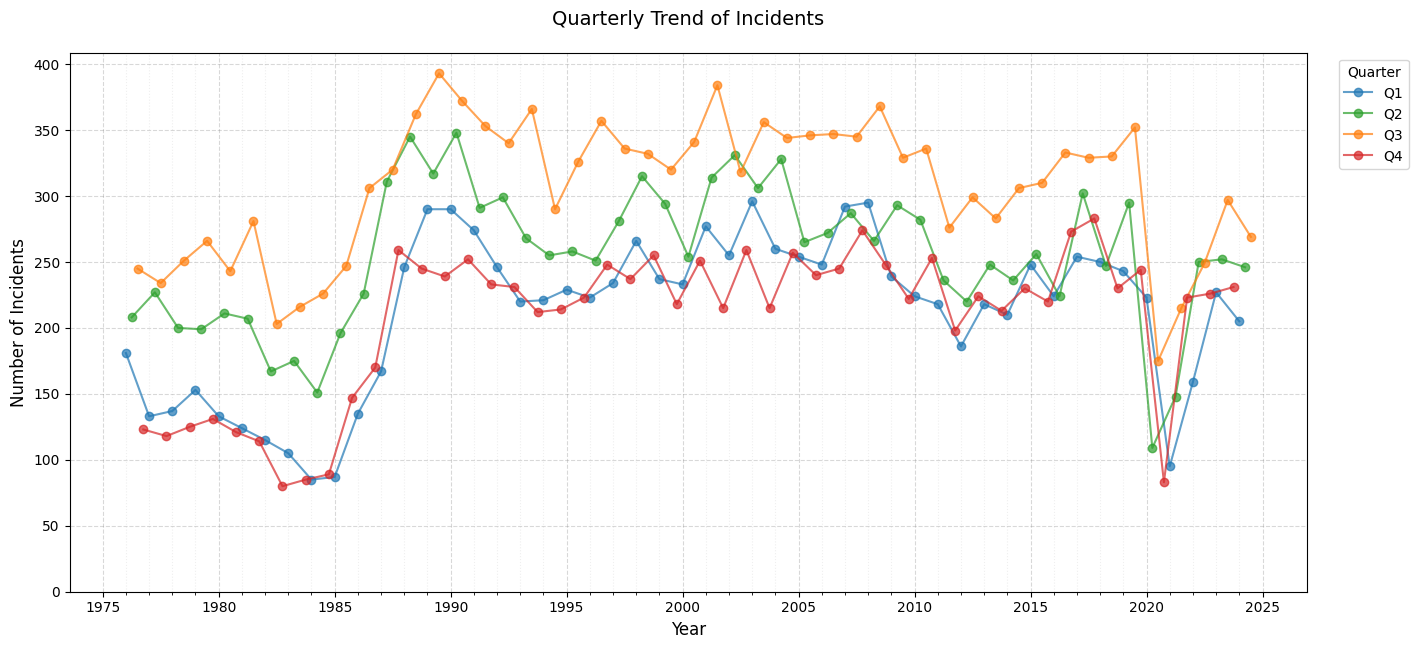

In [167]:
visualize_quarterly_trend(df)

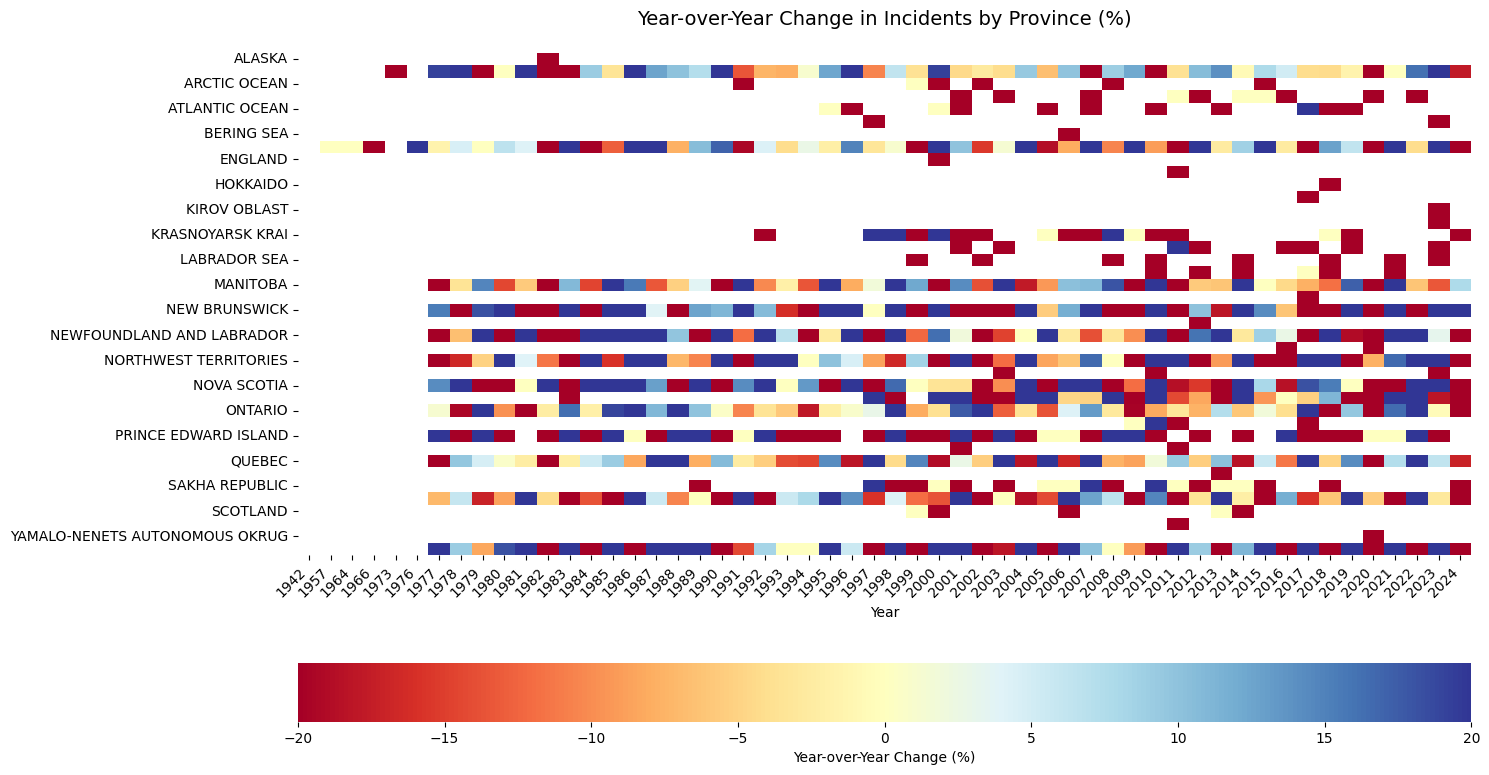

In [168]:
create_province_year_heatmap(df)

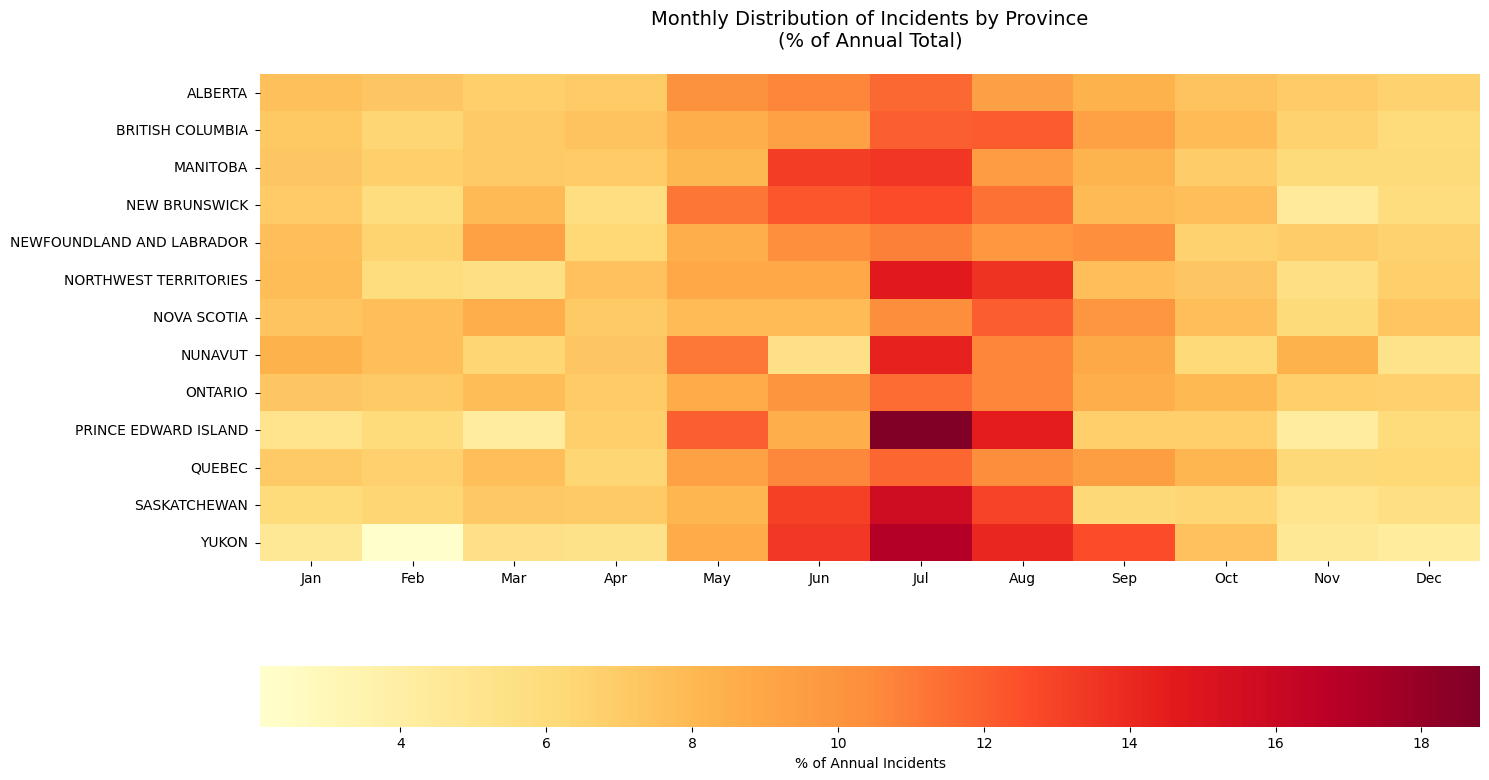

In [169]:
create_province_month_heatmap(df)